# Data Science I
### Klausur I im Sommersemester 2024

## Allgemeine Informationen

* Sie haben eine Woche Zeit, um die Klausur zu bearbeiten.

* Sie können alle Quellen verwenden, müssen sie jedoch korrekt benennen. Wenn Sie ChatGPT oder eine ähnliche Software verwenden, müssen Sie dies kenntlich machen und den verwendeten Prompt angeben.

* Sie sollten die folgenden Pakete verwenden: `numpy, pandas, scipy, geopy, scikit-learn/sklearn, matplotlib, seborn, openPyxl` und Pythons Standardlibraries. Diese sind ausreichend, um die Klausur zu lösen. Falls Sie andere Pakete verwenden, rechtfertigen Sie deren Verwendung.

* Der Code muss ausreichend kommentiert und verständlich sein. Schreiben Sie Funktionen beim Wiederverwenden von Code. Befolgen Sie im Allgemeinen die Richtlinien aus der Vorlesung. Punkte können aufgrund eines schlecht strukturierten oder unverständlichen Codes abgezogen werden.

* **Begründen Sie Entscheidungen** zur Auswahl von Plots, Hypothesentest usw. und **interpretieren Sie** Ihre Ergebnisse.

* Sie dürfen in keiner Form Hilfe oder Rat von Dritten in Anspruch nehmen.

* Bitte laden Sie Ihre vollständige Lösung der Klausur als `.zip`-Datei mit dem Dateinamen `vorname_matrikelnummer.zip` bis 8. August 2024 um 12:00 Uhr auf StudIP in den Ordner `Submission - Exam 1` hoch.

* Fügen Sie der `.zip` Datei auch die unterschriebene Eigenständigkeitserklärung hinzu.

* Wenn Sie Fragen haben, kontaktieren Sie uns bitte rechtzeitig über Rocketchat.

In [5]:
# IMPORT LIBRARIES
import numpy as np, pandas as pd, scipy, geopy, sklearn, matplotlib.pyplot as plt, seaborn, openpyxl, warnings, os, dsplotter

warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')

# Debugger
debug = False

## Aufgaben und Punkte:

<table>
  <thead>
    <tr>
      <th colspan="3">Aufgabe 1 - Data Preprocessing</th>
      <th colspan="2">Aufgabe 2 - Plotting</th>
      <th colspan="2">Aufgabe 3 - Statistics</th>
      <th colspan="2">Aufgabe 4 - Machine Learning </th>
    </tr>
    <tr>
      <th>Aufgabe 1.1</th>
      <th>Aufgabe 1.2</th>
      <th>Aufgabe 1.3</th>
      <th>Aufgabe 2.1</th>
      <th>Aufgabe 2.2</th>
      <th>Aufgabe 3.1</th>
      <th>Aufgabe 3.2</th>
      <th>Aufgabe 4.1</th>
      <th>Aufgabe 4.2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>10 Punkte </td>
      <td>12 Punkte </td>
      <td>2 Punkte </td>
      <td>11 Punkte</td>
      <td>27 Punkte </td>
      <td>13 Punkte </td>
      <td>5 Punkte </td>
      <td>10 Punkte </td>
      <td>10 Punkte </td>
    </tr>
    <!-- Add more rows as needed -->
  </tbody>
</table>


_____
## Aufgabe 0: Setup

Der Klausurordner enthält ein `Dockerfile`, in dem alle relevanten Pakete definiert sind. Das `Dockerfile` baut auf dem Jupyter Server Image auf. Verwenden Sie dieses Dockerfile, um zuerst ein Docker Image zu erstellen und dann einen Docker Container von diesem Image zu starten. Benutzen Sie anschließend die Jupyter Server Instanz, um an der Klausur zu arbeiten. Wir empfehlen dringend, die Docker-Umgebung zu verwenden, um Versionskonflikte zwischen den verschiedenen Paketen zu vermeiden. Code, der in dieser Umgebung nicht ausführbar ist, wird als **nicht funktional** bewertet.

____
## Aufgabe 1: Data Preprocessing (24 Punkte)

### Datenbeschreibung

Im Ordner `data` finden Sie die monatlichen Parkdaten der Stadt Göttingen für das Jahr 2023 (Feb.-Dez.). Die Parkschein-Verkäufe an den stationären Parkscheinautomaten befinden sich in den Dateien, deren Namen mit `Cale` beginnt, und die mit der Parkster-App gekauften Parkscheine befinden sich in den Dateien, deren Namen mit `Parkster` beginnen.<br>
Die Datei `parkzone_latlong.csv` enthält weitere geografische Informationen zu den Parkzonen und die Datei `psa_latlong.csv` enthält geografische Informationen über die Parkscheinautomaten innerhalb der Parkzone.

Die bereitgestellten Parkdaten sind echte Rohdaten und stammen direkt von der Stadt Göttingen. Wir haben lediglich die geografischen Informationen hinzugefügt.

*Bitte beachten Sie:*
- *Obwohl wir nur Daten von Februar bis Dezember haben, bezeichnen wir diese im Folgenden als jährlich.*
- *Aufgrund der Größe der Daten sollten Sie Ihren Arbeitsspeicher effizient verwenden. Vermeiden Sie daher die Speicherung mehrerer Kopien desselben DataFrames.*

#### Aufagbe 1.1 - Laden der Daten (10 Punkte)
Laden Sie die Dateien für die Parkscheinautomaten (`Cale-*`) und für die App (`Parkster-*`) und fügen Sie diese **jeweils** zu einem Dataframe zusammen, der die jährlichen Verkäufe für Parkscheinautomaten und App beinhaltet. <br>
Laden Sie auch die weiteren Informationen zu den Parkscheinautomaten (`psa_latlong.csv`) und Parkzonen (` parkzones_latlong.csv`).

Sie werden die Werte `0` und `999` in der Spalte `Automaten -ID` für die Daten der Parkscheinautomaten finden. <br> Ändern Sie die `0`en in `1`en und löschen Sie alle Einträge mit `999`.
Überprüfen Sie auch auf Zeilen-Duplikate und löschen Sie diese gegebenenfalls. 

In [6]:
# Function to load multiple datafiles as one dataframe
def load_data_files(filtername, skippingrows=0): # skippingrows are rows to skip
    print(f"{filtername} datafiles loading...")
    data_files = list(filter(lambda x: x.startswith(filtername), os.listdir('data'))) # file searching
    data_files_df = pd.concat([pd.read_excel(f"data/{file}", skiprows=skippingrows) for file in data_files]) # combine files in dataframe
    print(f"{filtername} datafiles finish\n===============")
    if debug: print(data_files_df)
    return data_files, data_files_df # return tuple of the files and the dataframe

# Function to load file
def loadcsv(filename):
    print(f"{filename} loading")
    file_df = pd.read_csv(f'data/{filename}')
    print(f"{filename} finish\n===============")
    if debug: print(file_df)
    return file_df

In [7]:
# data_loading "Cale-" skipping row 0 and 1 because of different formatting
parking_meters, parking_meters_df = load_data_files("Cale-", 2)

Cale- datafiles loading...
Cale- datafiles finish


In [8]:
# data_loading "Parkster-"
parking_app, parking_app_df = load_data_files("Parkster-")

Parkster- datafiles loading...
Parkster- datafiles finish


In [9]:
parkzones_latlong_df = loadcsv("parkzones_latlong.csv")

parkzones_latlong.csv loading
parkzones_latlong.csv finish


In [10]:
psa_latlong_df = loadcsv("psa_latlong.csv")

psa_latlong.csv loading
psa_latlong.csv finish


In [11]:

# ID Sortierung in Ints um bessere Übersicht zu haben.
parking_meters_df['Automat - Automaten ID'] = parking_meters_df['Automat - Automaten ID'].str.replace("PA", "").astype(int)
if debug: print(parking_meters_df)

In [12]:
# Convert MwSt to float
parking_app_df['Parkgebühren inkl. MwSt. in EUR'] = parking_app_df['Parkgebühren inkl. MwSt. in EUR'].str.replace(',', '.').astype(float) 
if debug: print(parking_app_df)

In [13]:
# 0s in 1s
parking_meters_df['Automat - Automaten ID'] = parking_meters_df['Automat - Automaten ID'].replace(0, 1)

# Drop Entry 999
parking_meters_df = parking_meters_df[parking_meters_df['Automat - Automaten ID'] != 999]

# Drop Duplicates
parking_meters_df.drop_duplicates()
parking_app_df.drop_duplicates()

if debug:
    print(parking_meters_df.columns)
    print(parking_app_df.columns)

#### Aufgabe 1.2 - Zusammenführen und Formatieren (12 Punkte)
Erstellen Sie einen DataFrame für beide Verkaufsarten, indem Sie die beiden zuvor erstellen DataFrames zusammenführen. Nutzen Sie dazu die Parkzonen Informationen *(in `parkzones_latlong.csv`)* und die Parkscheinautomatennummer *(in` pa_latlong.csv`)*. Stellen Sie sicher, dass sich in Ihrem DataFrame die geografischen Informationen für Parkscheinautomaten und Parkzonen befinden.
Verwenden Sie die Spalten `Kaufdatum Lokal` und `Start` für das Kaufdatum, codieren Sie die Spalte als `datetime`-Objekt und verwenden Sie sie als Indexspalte. Stellen Sie außerdem sicher, dass die anderen Spalten ein angemessenes Datenformat haben.

*Hinweis: Es ist zu erwarten, dass `Nan`-Werte für einige Spalten in den Zeilen zu Appkäufen auftauchen.*

In [14]:
# DataStructure Creation
park_data = {
    'time': 'datetime64[ns]',
    'machine_ID': 'Int64',
    'fee': 'float64',
    'category': 'object',
    'street': 'object',
    'latitude_machine': 'float64',
    'longitude_machine': 'float64',
    'zone': 'int64',
    'latitude_zone': 'float64',
    'longitude_zone': 'float64'}

In [15]:
# Um das mergen einfacher zu machen
parking_meters_df['Automat - Automaten ID'] = parking_meters_df['Automat - Automaten ID'].astype(str)
psa_latlong_df['PSA'] = psa_latlong_df['PSA'].astype(str)
parking_app_df['Zonencode'] = parking_app_df['Parkzone'].astype(str)

In [16]:
merged_psa_df = pd.merge(parking_meters_df, psa_latlong_df, how='left', left_on='Automat - Automaten ID', right_on='PSA')

In [17]:
merged_psa_df['Kaufdatum Lokal'] = pd.to_datetime(merged_psa_df['Kaufdatum Lokal'], format='%d.%m.%Y %H:%M:%S')

In [18]:
# Parkscheinautomaten-Daten mit geografischen Informationen zusammenführen
merged_psa_df = pd.merge(parking_meters_df, psa_latlong_df, how='left', left_on='Automat - Automaten ID', right_on='PSA')

# Parkzonen-Daten mit geografischen Informationen zusammenführen
merged_parkzones_df = pd.merge(parking_app_df, parkzones_latlong_df, how='left', left_on='Parkzone', right_on='Zonencode')

In [19]:
# Spalten in datetime-Objekte konvertieren
merged_psa_df['Kaufdatum Lokal'] = pd.to_datetime(merged_psa_df['Kaufdatum Lokal'], format='%d.%m.%Y %H:%M:%S')
merged_parkzones_df['Start'] = pd.to_datetime(merged_parkzones_df['Start'], format='%Y-%m-%d %H:%M:%S')
merged_parkzones_df['Stopp'] = pd.to_datetime(merged_parkzones_df['Stopp'], format='%Y-%m-%d %H:%M:%S')

In [20]:
# Index setzen
merged_psa_df.set_index('Kaufdatum Lokal', inplace=True)
merged_parkzones_df.set_index('Start', inplace=True)

In [21]:
print(merged_parkzones_df)

                     Parkzone             Erstellt               Stopp  \
Start                                                                    
2023-01-31 13:07:44     37008  2023-01-31 13:07:44 2023-02-01 14:00:00   
2023-01-31 15:40:23     37005  2023-01-31 15:40:23 2023-02-01 11:45:19   
2023-01-31 15:48:59     37005  2023-01-31 15:48:59 2023-02-01 11:34:59   
2023-01-31 15:58:47     37204  2023-01-31 15:58:47 2023-02-01 15:44:00   
2023-01-31 16:08:00     37105  2023-01-31 16:08:01 2023-02-01 01:38:00   
...                       ...                  ...                 ...   
2023-12-31 16:45:25     37108  2023-12-31 16:45:25 2023-12-31 17:43:25   
2023-12-31 17:09:16     37001  2023-12-31 17:09:16 2023-12-31 19:39:16   
2023-12-31 17:25:59     37105  2023-12-31 17:25:59 2023-12-31 19:45:35   
2023-12-31 17:52:09     37001  2023-12-31 17:52:09 2023-12-31 17:52:28   
2023-12-31 20:40:11     37108  2023-12-31 20:40:11 2023-12-31 23:10:11   

                     Parkgebühren ink

In [22]:
print(merged_psa_df)

                    Automat - Automaten ID Zahleinheit - Name     Knoten  \
Kaufdatum Lokal                                                            
2023-11-01 00:28:56                    320              Münze  Göttingen   
2023-11-01 00:44:21                      3              Münze  Göttingen   
2023-11-01 03:36:32                    354              Münze  Göttingen   
2023-11-01 05:06:07                    332              Münze  Göttingen   
2023-11-01 05:20:02                    334              Münze  Göttingen   
...                                    ...                ...        ...   
2023-02-04 11:45:50                     85              Münze  Göttingen   
2023-02-07 09:52:12                     85              Münze  Göttingen   
2023-02-22 08:49:18                     85              Münze  Göttingen   
2023-02-07 09:50:58                     85              Münze  Göttingen   
2023-02-11 09:50:41                     84              Münze  Göttingen   

           

#### Aufgabe 1.3 - DataFrame Check (2 Punkte)
Der bereinigte und vollständige DataFrame für die folgenden Aufgaben sollte der Datei `data/clean_dataframe.csv` entsprechen, der wie folgt eingelesen werden kann:

In [23]:
finish_df = pd.read_csv('data/clean_dataframe.csv', parse_dates=['time'], index_col='time', dtype={'machine_ID': 'Int64', 
                                                                           'fee': 'float64', 
                                                                           'category': 'object', 
                                                                           'street': 'object', 
                                                                           'latitude_machine': 'float64', 
                                                                           'longitude_machine': 'float64', 
                                                                           'zone': 'int64', 
                                                                           'latitude_zone': 'float64', 
                                                                           'longitude_zone': 'float64'}).sort_index()

Stellen Sie sicher, dass Ihr DataFrame mit `clean_dataframe.csv` übereinstimmt. Verwenden Sie dazu die Funktion [`pandas.DataFrame.equals`](https://pandas.pydata.org/docs/reference/api/pandas.dataframe.equals.html).

Sollte `pandas.DataFrame.equals` nach Ihren Anpassungen nicht `True` zurückgeben, arbeiten Sie bitte mit `clean_dataframe.csv` weiter und geben Sie dies in einer Markdown-Zelle an. In diesem Fall erhalten Sie keine Punkte für die Teilaufgabe 1.3.

_____
## Aufgabe 2: Plotting (38 Punkte)



### Aufgabe 2.1 - Analyse der Parkscheinautomaten (11 Punkte)
Die Stadt Göttingen möchte einen Überblick über die Umsätze der einzelnen **Parkscheinautomaten** erhalten und stellt Sie für eine anfängliche explorative Analyse des Verkaufsvolumens und der geografischen Anordnung der Automaten ein.

In [33]:
main_df = pd.read_csv('data/clean_dataframe.csv', parse_dates=['time'], index_col='time', dtype={
                                                                            'machine_ID': 'Int64', 
                                                                            'fee': 'float64', 
                                                                            'category': 'object', 
                                                                            'street': 'object', 
                                                                            'latitude_machine': 'float64', 
                                                                            'longitude_machine': 'float64', 
                                                                            'zone': 'int64', 
                                                                            'latitude_zone': 'float64', 
                                                                            'longitude_zone': 'float64'})


# weil in der Aufgabe öfter man die Daten aus dem Jahr 2023 braucht
df_2023 = main_df[main_df.index.year == 2023]


#### 2.1.1 (6 Punkte)
Finden Sie die fünf umsatzstärksten Parkscheinautomaten im Jahr 2023 und visualisieren Sie den **wöchentlichen** Umsatz im Laufe des Jahres.

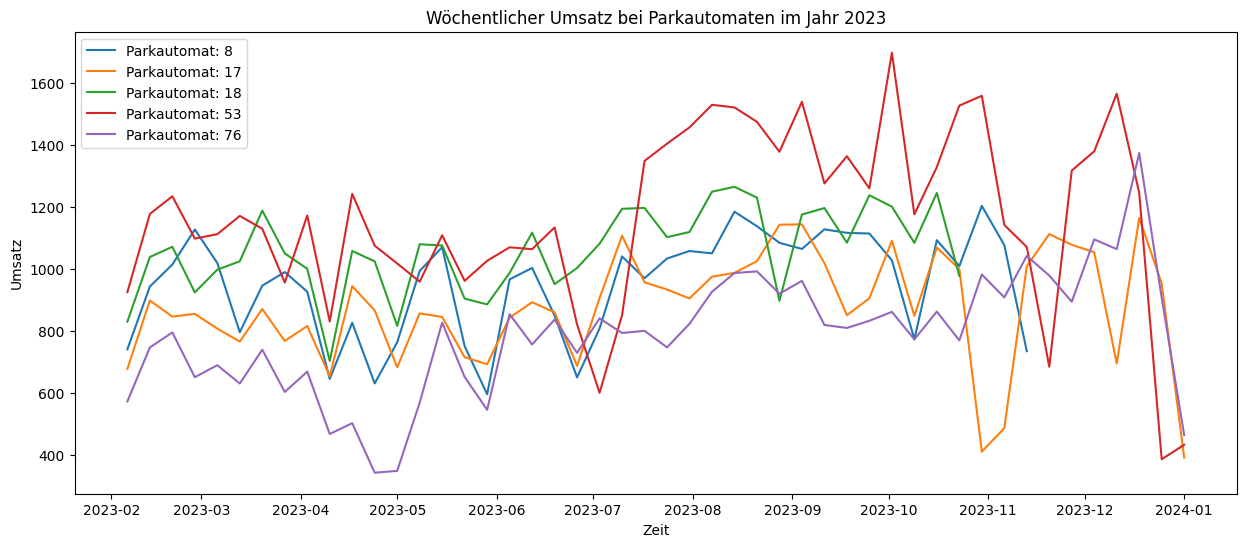

In [34]:
parking_meters_df_23 = main_df[(main_df.index.year == 2023) & (main_df['category'] == 'machine')]

# total sum of sales by a specific parking meter per week
sales_weekly = parking_meters_df_23.groupby([pd.Grouper(freq='W-MON'), 'machine_ID'])['fee']
sumsales_weekly = sales_weekly.sum().reset_index()

# top 5 sales
top5_pm = sumsales_weekly.groupby('machine_ID')['fee'].sum().nlargest(5).index
top5_sales = sumsales_weekly[sumsales_weekly['machine_ID'].isin(top5_pm)]


# Weekly 
plt.figure(figsize=(15,6))
for pm_id, pm_value_list in top5_sales.groupby('machine_ID'):
    plt.plot(pm_value_list['time'], pm_value_list['fee'], label=f'Parkautomat: {pm_id}')
plt.xlabel('Zeit')
plt.ylabel('Umsatz')
plt.title('Wöchentlicher Umsatz bei Parkautomaten im Jahr 2023')
plt.legend()
plt.show()


#### **Lösung der Aufgabe 2.1.1**

Die Top 5 Parkautomaten im Jahr 2023 sind **[8, 17, 18, 53, 76]**

#### 2.1.2 (5 Punkte)
Der Standort der Parkscheinautomaten könnte auch einen Einfluss auf deren Umsatz haben.

Machen Sie sich mit der Funktion `plot_map` aus der Bibliothek `dsplotter` vertraut. Verwenden Sie die Funktion, um den jährlichen Umsatz für jeden Automaten auf einer Karte zu visualisieren. Machen Sie die Farbe **und** den Radius der Standortmarkierung abhängig vom jährlichen Umsatz. Was haben Automaten mit einem hohen jährlichen Umsatz gemeinsam?

In [35]:

# Schritt 1: Berechnung des jährlichen Umsatzes für jeden Automaten
df_pm = main_df[main_df['category'] == 'machine']
df_pm['year'] = df_pm.index.year
sales_yearly = df_pm.groupby(['machine_ID', 'latitude_machine', 'longitude_machine', 'year'])['fee'].sum().reset_index()

# Schritt 2: Vorbereitung der Daten für die Visualisierung
sales_total = sales_yearly.groupby(['machine_ID', 'latitude_machine', 'longitude_machine'])['fee'].sum().reset_index()
if debug: print(sales_total)

print()

# Schritt 3: Erstellung der Karte mit plot_map
dsplotter.plot_map(
    data=sales_total,
    color_col='fee',
    radius_col='fee',
    radius_scale=15,
    alpha=0.8
)

/tmp/ipykernel_3417/2209886917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm['year'] = df_pm.index.year



Use column longitude_machine for the longitude coordinate.
 Use the column latitude_machine for the latitude coordinate.


#### Lösung **Aufgabe 2.1.2**


Die Parkautomaten die einen hohen Umsatz generieren liegen vor allem im Zentrum der Innenstadt oder auf dem Zentralcampus. 

### Aufgabe 2.2 - Analyse der Automaten- und Appnutzung pro Parkzone (27 Punkte)
Im Rahmen der Digitalisierungsinitiative der Stadt wurde die Parkster-App vor einigen Jahren als Alternative zu Parkscheinautomaten eingeführt.
Bisher wurden nur die Parkscheinautomaten in die Analyse eingeschlossen und daher einen Großteil des Ticketverkaufs, der über die App stattfand, nicht beachtet.

Die Stadt möchte für 2023 eine erste visuelle Analyse der Akzeptanz der App in den einzelnen Parkzonen durchführen und anschließend den gesamten Umsatz analysieren.

*Hinweis: Beachten Sie, dass wir die Umsätze aus der Appnutzung nur einschließen können, indem wir die Gesamtauswertung auf Ebene der Parkzonen durchführen.*

In [109]:
# Relationswerte suchen
usage_rate = df_2023.groupby(['zone', 'category'])['fee'].count().unstack().fillna(0)
usage_rate['total'] = usage_rate.sum(axis=1)

# neue einträge für APP Relationswert und Parkautomat Relationswert
usage_rate['app_rate'] = usage_rate['app'] / usage_rate['total']
usage_rate['machine_rate'] = usage_rate['machine'] / usage_rate['total']
usage_rate = usage_rate.sort_index()

# Daten für die Plots
width = 0.4 
usage_ratelen = np.arange(len(usage_rate))

# Auf den bars einen Text draufprinten bzw. die values der einzelnen
def define_labels(bars, graph, relative=False):
    for bar in bars:
        height = bar.get_height()
        graph.annotate((f'{height:.2f}') if relative else (f'{height:.0f}'),
                    xy=(bar.get_x() + bar.get_width() / 2, height), # Position des Textes
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=(0 if relative else 90), fontsize=12) # Weil sonst sieht man die texte nicht so gut auf den balken bei den absolutwerten

#### 2.2.1 (6 Punkte)
Bevorzugen Parkende die App- oder die Parkscheinautomatennutzung? 

Verwenden Sie einen geeigneten Plot, um die durchschnittliche Automaten- bzw. Appnutzungsrate pro **Parkzone** für das gesamte Jahr 2023 zu visualisieren. Was können Sie dem Plot entnehmen?

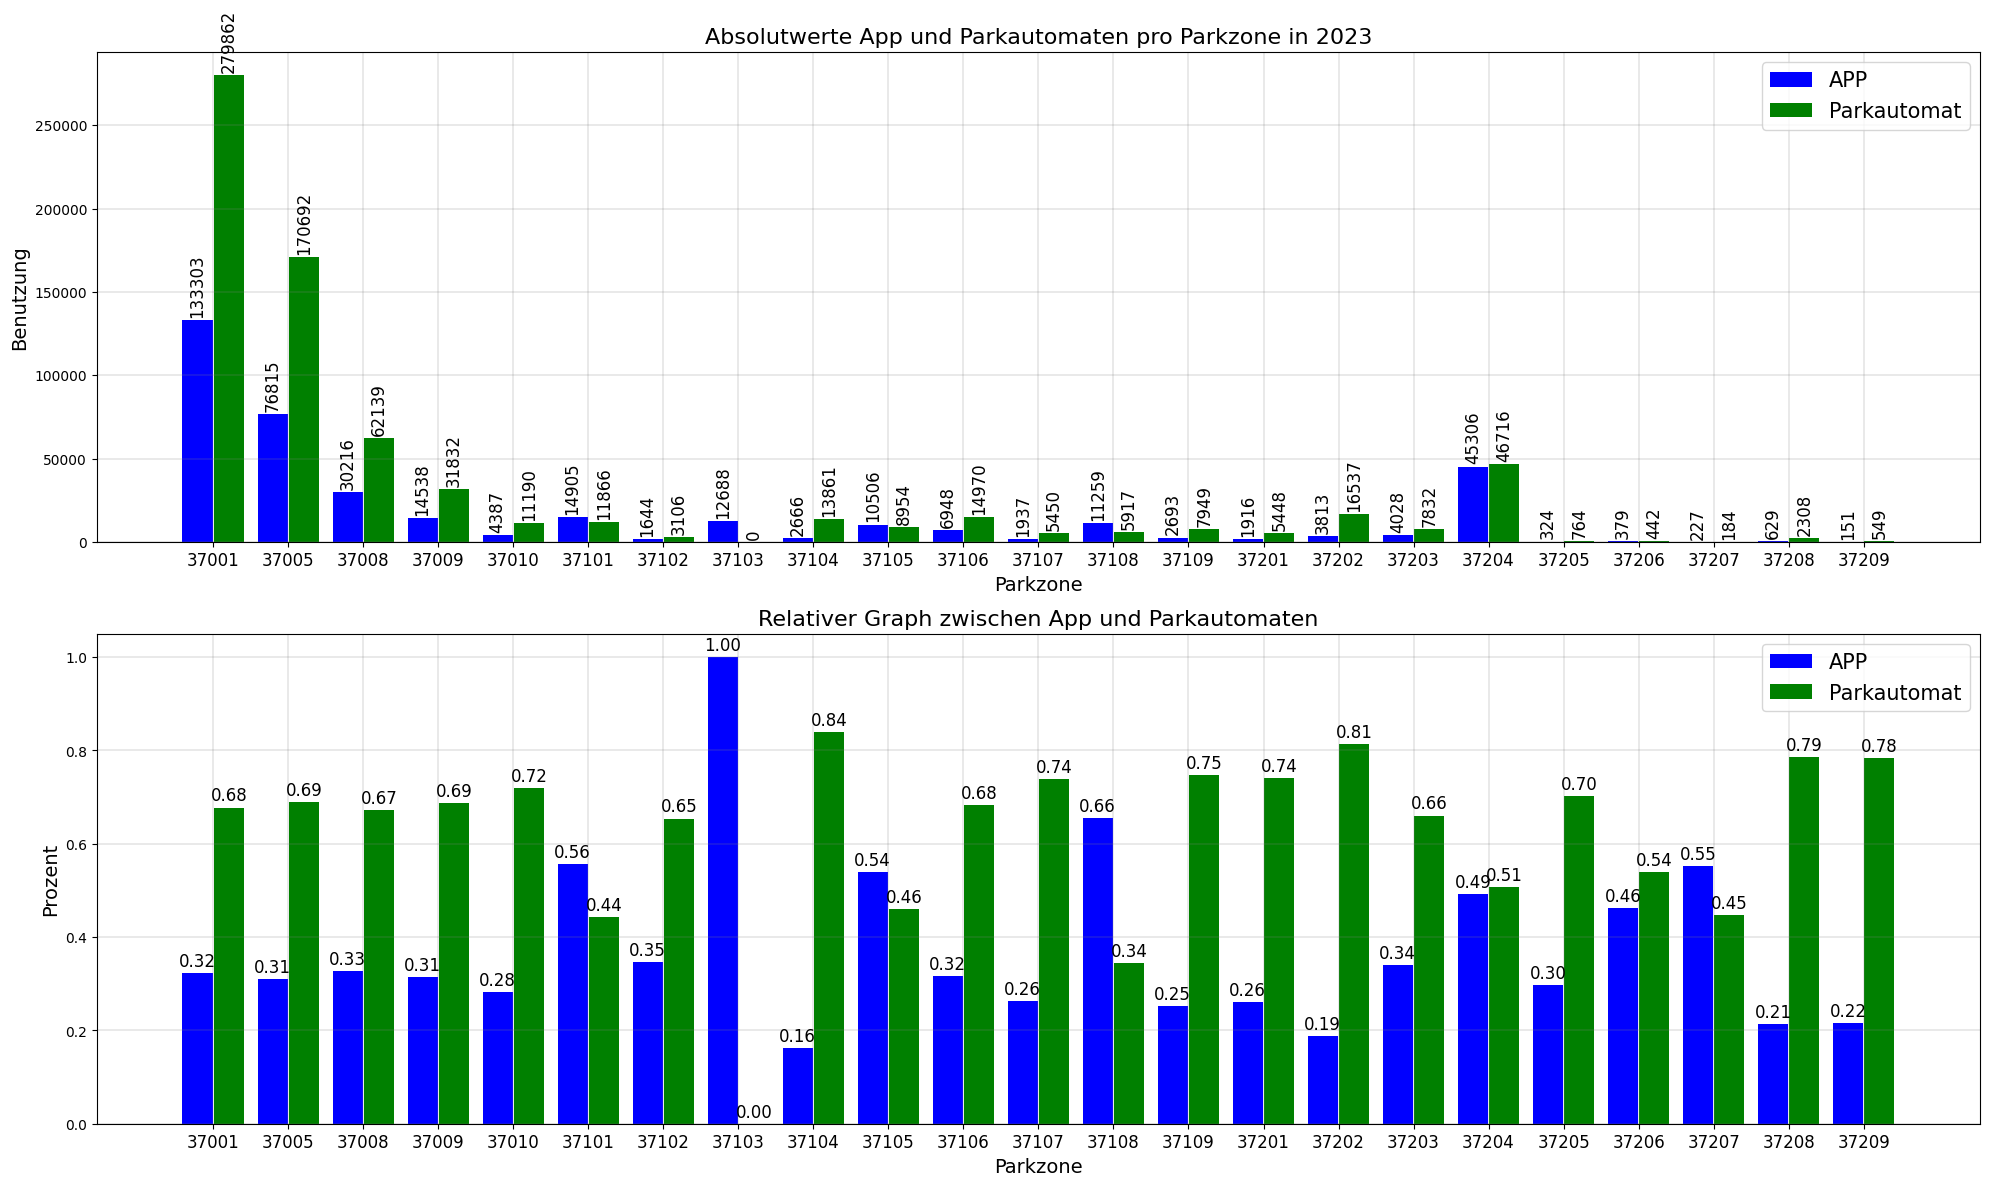

In [110]:
# Die Plots
fig, (absolutegraph, relativegraph) = plt.subplots(2, 1, figsize=(20, 12))

# Absoluter Graph
app_bars = absolutegraph.bar(usage_ratelen - width/2 - 0.01, usage_rate['app'], width, label='APP', color='blue')
pm_bars = absolutegraph.bar(usage_ratelen + width/2 + 0.01, usage_rate['machine'], width, label='Parkautomat', color='green')


# Relativer Graph
app_rate_bars = relativegraph.bar(usage_ratelen - width/2 - 0.01, usage_rate['app_rate'], width, label='APP', color='blue')
pm_rate_bars = relativegraph.bar(usage_ratelen + width/2 + 0.01, usage_rate['machine_rate'], width, label='Parkautomat', color='green')

def customize(graph, title, ylabel):
    labels_fs = 14
    graph.set_xlabel("Parkzone", fontsize = labels_fs)
    graph.set_ylabel(ylabel, fontsize = labels_fs)
    graph.set_title(title, fontsize = 16)
    graph.set_xticks(usage_ratelen)
    graph.set_xticklabels(usage_rate.index, ha='center', fontsize=12)
    graph.grid(True, color='gray', linewidth=0.25)
    graph.legend(fontsize=15)
    
customize(absolutegraph, "Absolutwerte App und Parkautomaten pro Parkzone in 2023", "Benutzung")
define_labels(app_bars, absolutegraph)
define_labels(pm_bars, absolutegraph)

customize(relativegraph, 'Relativer Graph zwischen App und Parkautomaten', "Prozent")
define_labels(app_rate_bars, relativegraph, True)
define_labels(pm_rate_bars, relativegraph, True)

plt.tight_layout()
plt.show()

#### **Lösung 2.2.1**

Man kann an den Graphen erkennen, dass mehr Personen die Parkautomaten statt die App benutzen, bis auf in einzelnen Parkzonen, wo aber die Anzahl an Parknutzungen so gering ist, dass im Kontext man dennoch darauf schließen kann das mehr Leute die Parkautomaten benutzen.

#### 2.2.2 (9 Punkte)
Wie stark werden die einzelnen Parkzonen genutzt? 

Visualisieren Sie die Gesamtzahl der Verkäufe und die Automaten- bzw. Appnutzungrate für jede Parkzone im Jahr 2023 **in einem Diagramm**. Verwenden Sie für die y-Achse eine `log`-Skalierung. Was können Sie dem Plot entnehmen?

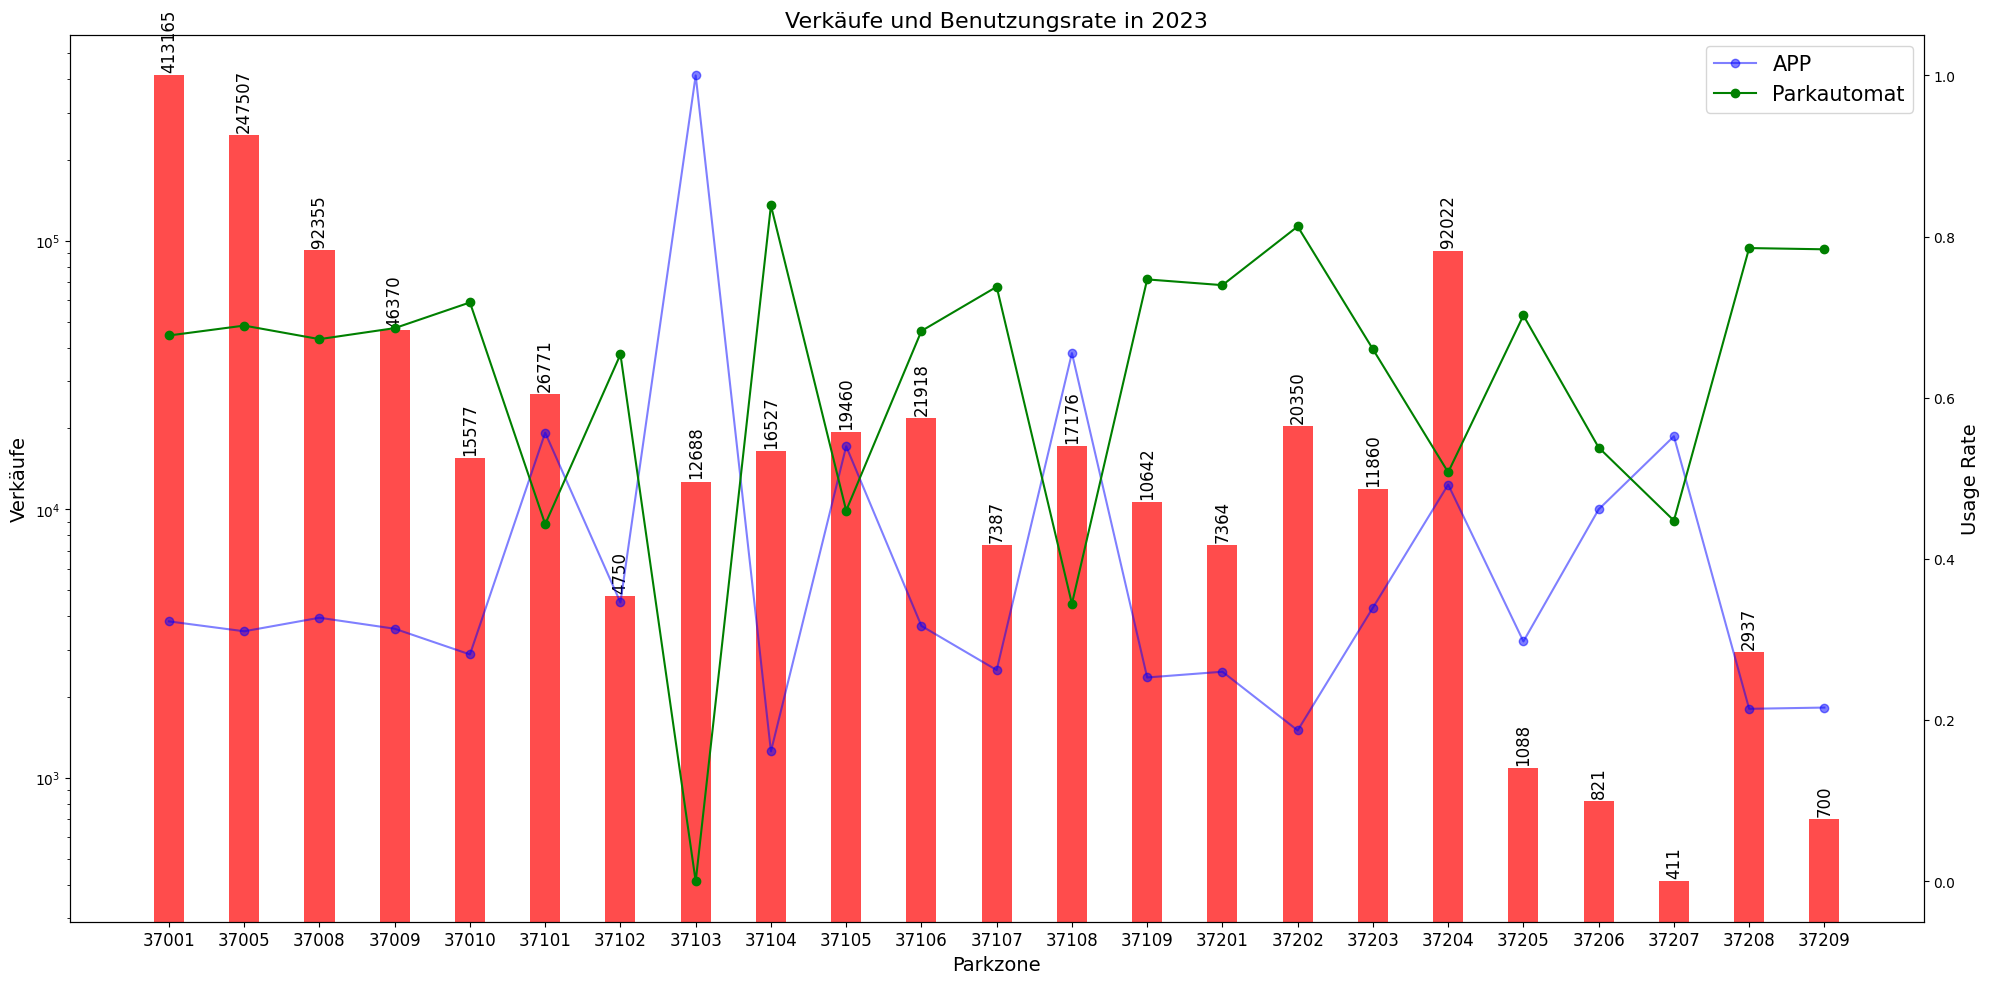

In [143]:
fig, totalsales_usagerates = plt.subplots(figsize=(20, 10))
# Plot von den Verkäufen
color = 'red'
totalsales_usagerates.set_xlabel('Parkzone', fontsize=14)
totalsales_usagerates.set_ylabel('Verkäufe', color='black', fontsize=14)
bars = totalsales_usagerates.bar(usage_ratelen, usage_rate['total'], width, color=color, alpha=0.7)
totalsales_usagerates.tick_params(axis='y', labelcolor='black')

# Logarithmische Skala für die Verkäufe
totalsales_usagerates.set_yscale('log')

define_labels(bars, totalsales_usagerates)

# Plot von den Benutzungsraten
rategraph = totalsales_usagerates.twinx()
rategraph.set_ylabel('Usage Rate', color='black', fontsize=14)
rategraph.plot(usage_ratelen, usage_rate['app_rate'], color='blue',alpha=0.5, label='APP', marker='o',)
rategraph.plot(usage_ratelen, usage_rate['machine_rate'], color='green', marker='o', label='Parkautomat')
rategraph.tick_params(axis='y', labelcolor='black')
rategraph.legend(loc='upper right', fontsize=15)

# Titel und Labels
plt.title('Verkäufe und Benutzungsrate in 2023', fontsize=16)
totalsales_usagerates.set_xticks(usage_ratelen)
totalsales_usagerates.set_xticklabels(usage_rate.index, ha='center', fontsize=12)
plt.tight_layout()
plt.show()

#### **Lösung Aufgabe 2.2.2**



#### 2.2.3 (7 Punkte)
Der vorherige Plot gibt uns eine Vorstellung von der Gesamtzahl der Parktickets *pro Parkzone*. Diese korreliert sehr wahrscheinlich stark mit der Anzahl der Parkplätze pro Zone. Um Parkzonen mit einer unterschiedlichen Anzahl an Parkplätzen zu vergleichen, sollten wir diese mithilfe der Anzahl der verfügbaren Parkplätze je Zone relativieren. Auf diese Weise können wir herausfinden, welche Zonen, relativ zu ihrer Größe, am häufigsten verwendet werden. Da wir nicht die Anzahl der Parkplätze für jede Zone zur Verfügung haben, können wir nur die Anzahl der Parkscheinautomaten als grobe Annäherung verwenden. 

Verwenden Sie die Informationen aus `psa_latlong.csv` und reproduzieren Sie den vorherigen mit Plot der Gesamtzahl der Verkäufe pro Automat für jede Parkzone. Verwenden Sie für die y-Achse eine `log`-Skalierung. Welche Parkzone wird am meisten genutzt?

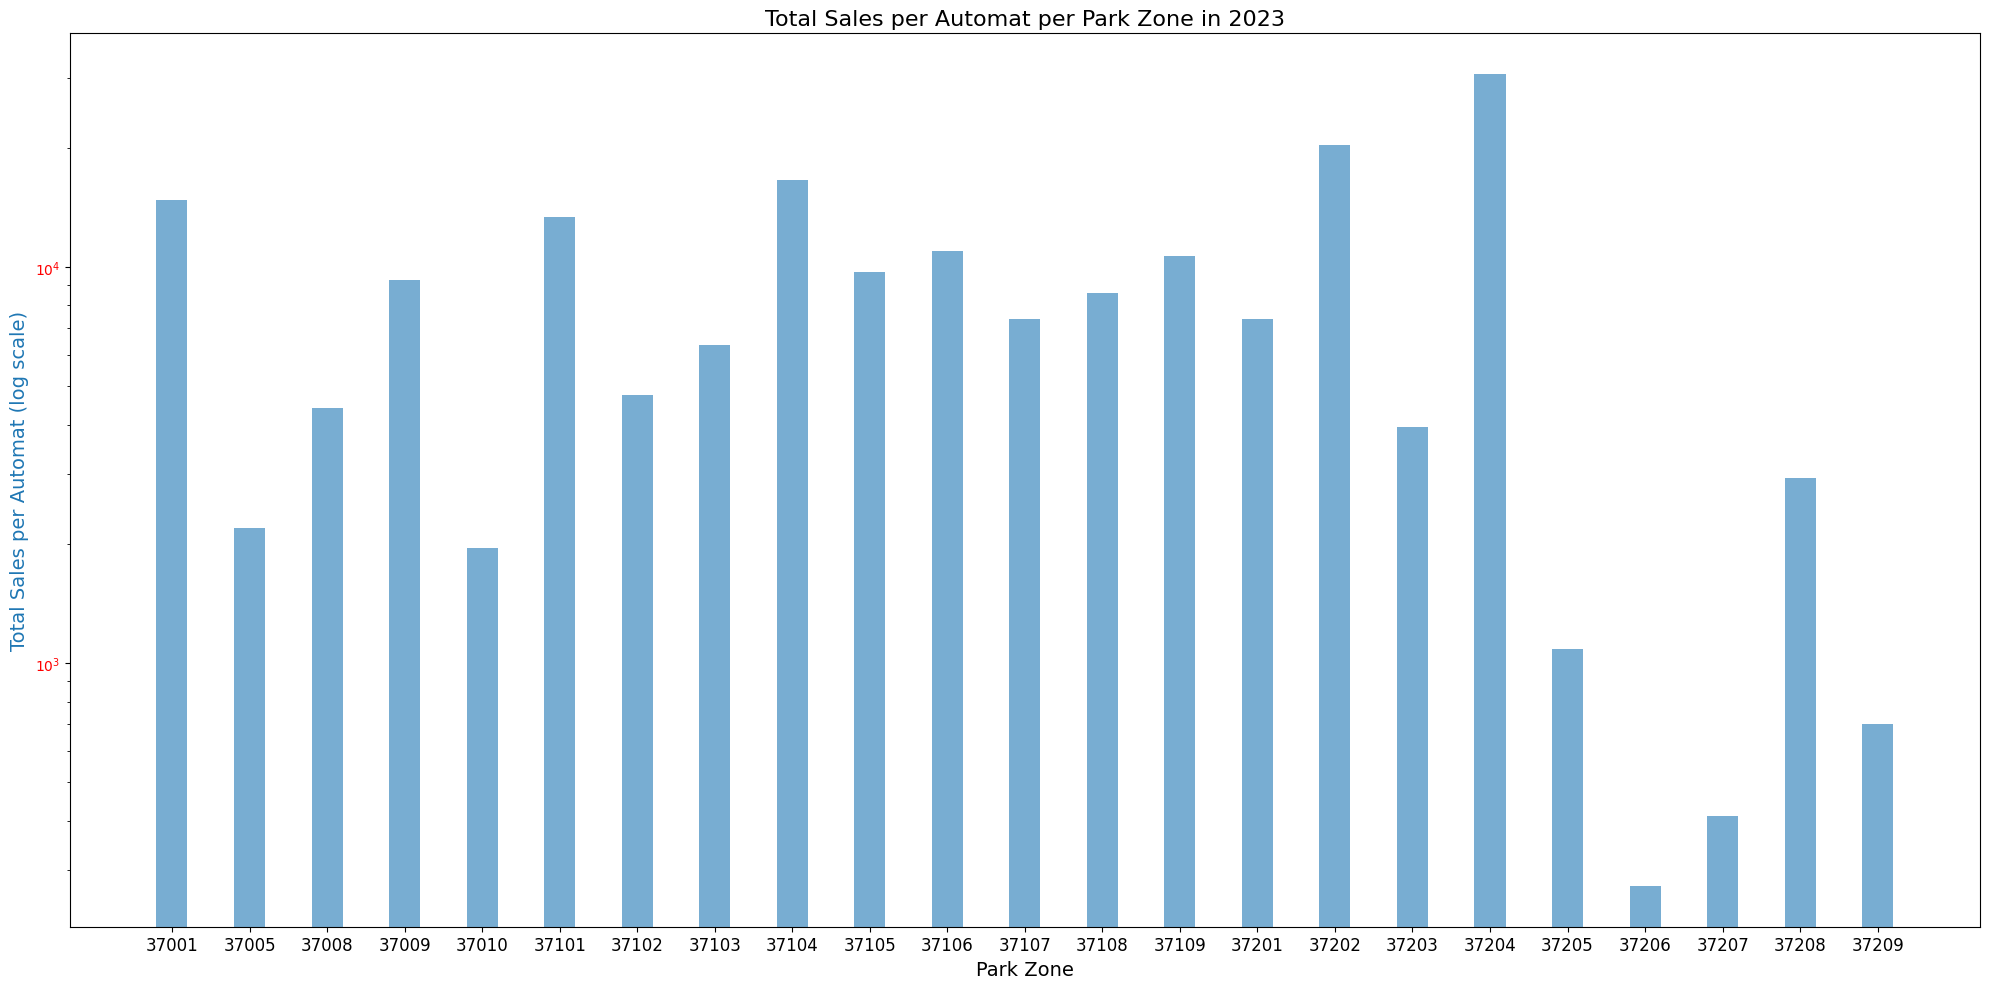

In [149]:
pmcount_per_zone = psa_latlong_df['zone'].value_counts().sort_index()
sales_per_zone = df_2023.groupby('zone')['fee'].count()

# Berechnung der Verkäufe pro Automat pro Parkzone
sales_per_pm = sales_per_zone / pmcount_per_zone

# Erstellung eines DataFrame mit den Ergebnissen
sales_per_pm_df = sales_per_pm.reset_index()
sales_per_pm_df.columns = ['zone', 'sales_per_pm']
sales_per_pm_df = sales_per_pm_df.sort_values(by='zone')

# Plotten der Ergebnisse
fig, graph = plt.subplots(figsize=(20, 10))

# Plot der Verkäufe pro Automat mit logarithmischer Skalierung der y-Achse
color = 'tab:blue'
graph.set_xlabel('Park Zone', fontsize=14)
graph.set_ylabel('Total Sales per Automat (log scale)', color=color, fontsize=14)
bars = graph.bar(usage_ratelen, sales_per_pm_df['sales_per_pm'], width, color='red', alpha=0.6)
graph.tick_params(axis='y', labelcolor='red')
graph.set_yscale('log')


define_labels(bars,ax)
# Hinzufügen von Titeln und Formatierungen
plt.title('Total Sales per Automat per Park Zone in 2023', fontsize=16)
graph.set_xticks(usage_ratelen)
graph.set_xticklabels(sales_per_pm_df['zone'], ha='center', fontsize=12)
plt.tight_layout()
plt.show()



#### 2.2.4 (5 Punkte)
Bisher haben wir die geografischen Informationen der Parkzonen nicht mit einbezogen. 

Verwenden Sie erneut die Funktion `plot_map`, um den Standort aller Parkzonen, ihre durchschnittlichen Tickets pro Automat und die Automaten- bzw. Appnutzungsrate zu visualieren. Färben Sie den Kartenmarker mithilfe der Automaten- bzw. Appnutzungsrate und legen Sie den Radius mit den durschnittlich verkauften Tickets pro Automat fest. Was können Sie der Darstellung entnehmen?

In [30]:
# Filterung der Daten für das Jahr 2023
df_2023 = main_df[main_df.index.year == 2023]

# Laden der Datei psa_latlong.csv
psa_latlong = pd.read_csv('data/psa_latlong.csv')

# Berechnung der Anzahl der Automaten pro Parkzone
automat_count_per_zone = psa_latlong['zone'].value_counts().sort_index()

# Berechnung der Gesamtverkäufe pro Parkzone
total_sales_per_zone = df_2023.groupby('zone')['fee'].count()

# Berechnung der Verkäufe pro Automat pro Parkzone
sales_per_automat = total_sales_per_zone / automat_count_per_zone

# Berechnung der Nutzung pro Kategorie und Parkzone
usage_rate = df_2023.groupby(['zone', 'category'])['fee'].count().unstack().fillna(0)
usage_rate['total'] = usage_rate.sum(axis=1)
usage_rate['app_rate'] = usage_rate['app'] / usage_rate['total']
usage_rate['machine_rate'] = usage_rate['machine'] / usage_rate['total']

# Kombinieren der Daten
combined_df = sales_per_automat.to_frame().join(usage_rate[['app_rate', 'machine_rate']])
combined_df.reset_index(inplace=True)
combined_df = combined_df.merge(psa_latlong.drop_duplicates('zone')[['zone', 'latitude', 'longitude']], on='zone')
combined_df.columns = ['zone', 'sales_per_automat', 'app_rate', 'machine_rate', 'latitude', 'longitude']

# Plotting the map with plot_map function
dsplotter.plot_map(
    data=combined_df,
    color_col='app_rate',  # or 'machine_rate' to color by machine usage rate
    radius_col='sales_per_automat',
    radius_scale=10,
    alpha=0.9
)

___
## Aufgabe 3: Statistics (18 Punkte)


#### Aufgabe 3.1 - t-Test (13 Punkte)
Zusätzlich zu der visuellen Analyse möchte die Stadt nun auch eine statistische Untersuchung der Verwendung von Parkscheinautomaten und Apps durchführen.

Bestimmen Sie dazu zunächst die Automaten- bzw. Appnutzungsrate pro Parkzone für jeden Kalendertag. Führen Sie anschließend für **jede Parkzone** einen t-Test durch, der testet, ob Parkende es vorziehen die App in der jeweiligen Zone zu verwenden. Schreiben Sie das entsprechende Hypothesenpaar auf, führen Sie den Test durch und interpretieren Sie Ihre Testergebnisse. Verwenden Sie für Ihre Testentscheidung ein Signifikanzniveau von 0.05. Welche grundlegende Annahme von statistischen Tests könnte bei diesem Vorgehen verletzt werden?

In [31]:
#Schritt 1: Berechnung der Nutzungsrate pro Kalendertag und Parkzone

# Filterung der Daten für das Jahr 2023
df_2023 = main_df[main_df.index.year == 2023]

# Berechnung der täglichen Nutzungsrate pro Parkzone
daily_usage = df_2023.groupby([df_2023.index.date, 'zone', 'category'])['fee'].count().unstack().fillna(0)
daily_usage['total'] = daily_usage.sum(axis=1)
daily_usage['app_rate'] = daily_usage['app'] / daily_usage['total']
daily_usage['machine_rate'] = daily_usage['machine'] / daily_usage['total']
daily_usage.reset_index(inplace=True)

In [32]:
# Schritt 2: Durchführung des t-Tests für jede Parkzone

# Liste der Zonen
zones = daily_usage['zone'].unique()

# Hypothesenpaar
# H0: Die durchschnittliche Nutzungsrate der App ist gleich der der Automaten (keine Präferenz)
# H1: Die durchschnittliche Nutzungsrate der App ist ungleich der der Automaten (es gibt eine Präferenz)

t_test_results = []

for zone in zones:
    zone_data = daily_usage[daily_usage['zone'] == zone]
    app_rate = zone_data['app_rate']
    machine_rate = zone_data['machine_rate']
    
    t_stat, p_value = ttest_ind(app_rate, machine_rate)
    
    t_test_results.append({
        'zone': zone,
        't_stat': t_stat,
        'p_value': p_value,
        'reject_null': p_value < 0.05
    })

t_test_results_df = pd.DataFrame(t_test_results)

# Schritt 3: Interpretation der Ergebnisse

# Ausgabe der Ergebnisse des t-Tests
t_test_results_df



NameError: name 'ttest_ind' is not defined

#### Aufgabe 3.2 - Statistisches Verständnis (5 Punkte)
Angenommen, für die Zone `37106` beträgt die durchschnittliche Automaten- bzw. Appnutzungsrate `0.5`.
Die Stadt sendet Ihnen die Daten für 2024. 

An wie vielen Tagen können Sie erwarten, dass die Appnutzung signifikant höher ist, wenn Sie weiterhin von einem Signifikanzniveau von `0.05` ausgehen? Erklären Sie, warum dies der Fall ist. Nehmen Sie an, dass sich das Verhalten der Parkenden im Vergleich zu 2023 nicht geändert hat.

In [ ]:
# Anzahl der Tage in 2024
num_days = 366

# Signifikanzniveau
alpha = 0.05

# Erwartete Anzahl der Tage
expected_significant_days = num_days * alpha
expected_significant_days

# Errechne Signifikazniveau
expected_significant_days = 366 * 0.05
print(expected_significant_days)

18.3


___
## Aufgabe 4: Machine Learning (20 Punkte)

Nutzen Sie ein K-Nearest-Neighbors (KNN) Modell, um die Automaten- bzw. Appnutzungsrate mithilfe des Standortes (`latitude`, `longitude`) und der Parkgebühr (`fee`) vorherzusagen. Verwenden Sie ausschließlich Datenreihen mit Parkgebühren zwischen 2 Euro und 7 Euro.

#### Aufgabe 4.1 - Modell-Training and Hyperparameter-Suche (10 Punkte)
Bereiten Sie die Daten sinnvoll auf, führen Sie eine Hyperparameter-Suche nach optimalem K-Wert aus, visualisieren Sie die Ergebnisse der Hyperparameter-Suche und verwenden Sie schließlich Ihren optimalen K-Wert, um das Modell zu trainieren.

*Hinweis: Verwenden Sie 30% aller Daten zur Bestimmung des optimalen K-Wertes, um die Hyperparameter-Suche zu beschleunigen, und den gesamten Datensatz für das Modell-Training.*


In [ ]:
# Schritt 1: Datenaufbereitung

# Filtern der Daten auf Parkgebühren zwischen 2 Euro und 7 Euro
df_filtered = df[(df['fee'] >= 2) & (df['fee'] <= 7)]

# Konvertieren der Kategorie (App oder Automat) in eine binäre Variable
df_filtered['is_app'] = (df_filtered['category'] == 'app').astype(int)

# Auswahl der relevanten Merkmale und des Zielwertes
features = df_filtered[['latitude_machine', 'longitude_machine', 'fee']]
target = df_filtered['is_app']

NameError: name 'df' is not defined

#### Aufgabe 4.2 - Visualisierung der Modell-Vorhersage (10 Punkte)
Erstellen Sie ein `100 x 100` Grid aus Längen-/Breitengradwerten unter Verwendung der minimalen und maximalen Werte in Ihrem Datensatz. Visualisieren Sie die Vorhersagen des KNN-Modells **für drei verschiedene Parkgebühren** - 3, 5 und 7 Euro. Verwenden Sie dazu die Funktion `plot_map`. Färben Sie den Marker entsprechend der Modell-Vorhersage. Beschreiben Sie mindestens 2 visuelle Veränderungen des vorhergesagten Nutzungsmusters auf der Karte.